*@rguptabinary*

# Stock data analysis

This notebook provides an analysis for the stocks, we are going to write models for

### Import dependencies

DESCRIPTION

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import datetime

%matplotlib inline

def plot_name(name):
    return 'images/{}_{}.png'.format('common', name)

### Load the data into dataframe


In [2]:
from deepstocks.common_configs import RNNConfig, Stock_names, Features
from deepstocks.data_loader import get_csv_data

config = RNNConfig()
stock_names = Stock_names()
features = Features()

start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2015, 1, 1)

date_frame = pd.date_range(start_date, end_date)
df = pd.DataFrame(index=date_frame)

spy = get_csv_data(stock_names.to_symbol['spy'], start_date, end_date, config.window)

amazon = get_csv_data(stock_names.to_symbol['amazon'], start_date, end_date, config.window)
amazon = df.join(amazon, how='inner')

google = get_csv_data(stock_names.to_symbol['google'], start_date, end_date, config.window)
google = df.join(google, how='inner')

apple = get_csv_data(stock_names.to_symbol['apple'], start_date, end_date, config.window)
apple = df.join(apple, how='inner')

### Visualize the data

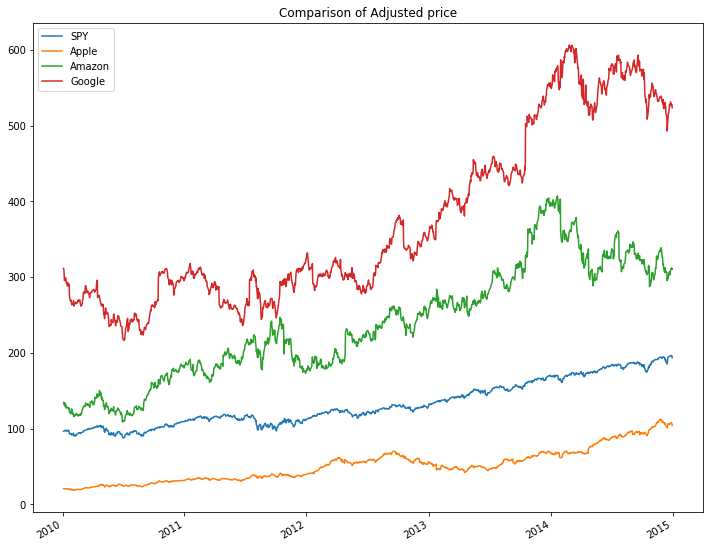

In [3]:
# Adjusted closing price
spy[features.adj].plot(label='SPY',figsize=(12,10),title='Comparison of Adjusted price')
apple[features.adj].plot(label='Apple')
amazon[features.adj].plot(label='Amazon')
google[features.adj].plot(label='Google')
plt.legend()

plt.savefig(plot_name('adj_price_comparison'))

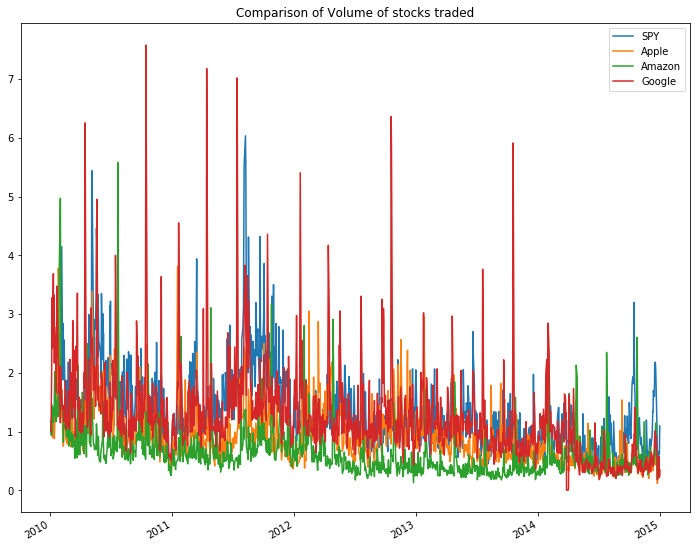

In [4]:
# volume traded
spy[features.vol].plot(label='SPY',figsize=(12,10),title='Comparison of Volume of stocks traded')
apple[features.vol].plot(label='Apple')
amazon[features.vol].plot(label='Amazon')
google[features.vol].plot(label='Google')
plt.legend()
plt.savefig(plot_name('volume_comparison'))

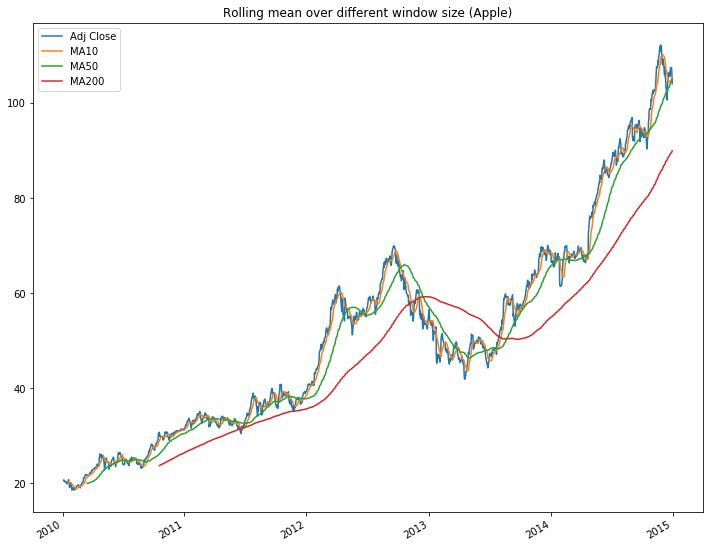

In [5]:
# moving averages plot
apple['MA10'] = apple[features.adj].rolling(10).mean()
apple['MA50'] = apple[features.adj].rolling(50).mean()
apple['MA200'] = apple[features.adj].rolling(200).mean()
apple[[features.adj, 'MA10', 'MA50','MA200']].plot(label='Apple',figsize=(12,10), title="Rolling mean over different window size (Apple)")

plt.savefig(plot_name('rolling_window_comparison'))

### Explore the correlation


In [6]:
apple.drop(['MA10', 'MA50', 'MA200'], 1, inplace=True)

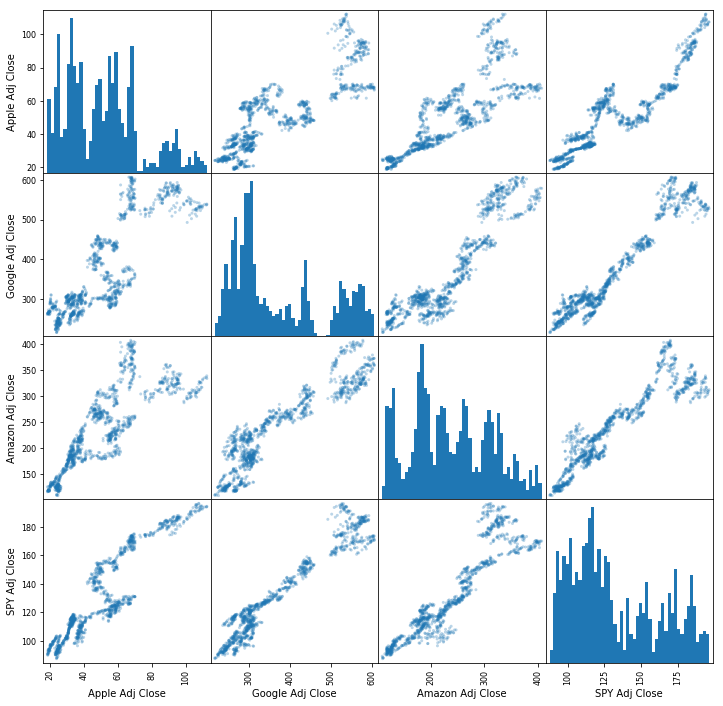

In [7]:
# correlation plots
from pandas.plotting import scatter_matrix

car_comp = pd.concat([apple[features.adj],google[features.adj],amazon[features.adj], spy[features.adj]],axis=1)

car_comp.columns = ['Apple ' + features.adj,'Google ' + features.adj,
                    'Amazon ' + features.adj, 'SPY ' + features.adj]
scatter_matrix(car_comp,figsize=(12,12),alpha=0.3,hist_kwds={'bins':50})
#plt.suptitle('Correlation between stocks')
plt.savefig(plot_name('stock_correlations'))

### Exploring the window size for moving averages

### Daily percentage changes

In [8]:
# add the return column to the dataframe
spy['returns'] = (spy[features.adj] / spy[features.adj].shift(1) ) - 1
apple['returns'] = (apple[features.adj] / apple[features.adj].shift(1) ) - 1
amazon['returns'] = (amazon[features.adj] / amazon[features.adj].shift(1) ) - 1
google['returns'] = (google[features.adj] / google[features.adj].shift(1) ) - 1

apple.head()

,Adj Close,Volume,Rolling mean,returns
2010-01-04,20.696495,1.000000,NaN,NaN
2010-01-05,20.732277,1.219098,NaN,0.001729
2010-01-06,20.402506,1.118345,NaN,-0.015906
2010-01-07,20.364788,0.966382,NaN,-0.001849
2010-01-08,20.500175,0.906591,NaN,0.006648


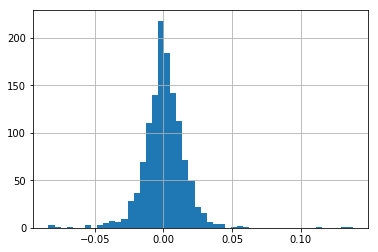

In [9]:
# plot the histogram
google['returns'].hist(bins=50)
plt.savefig(plot_name('returns_google'))

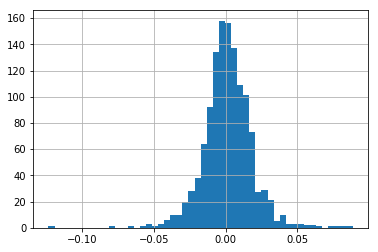

In [10]:
apple['returns'].hist(bins=50)
plt.savefig(plot_name('returns_apple'))

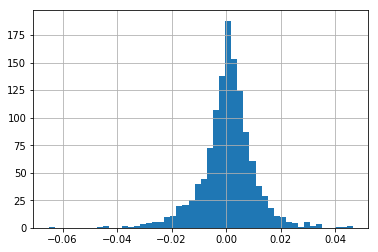

In [11]:
spy['returns'].hist(bins=50)
plt.savefig(plot_name('returns_spy'))

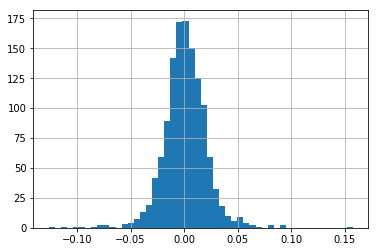

In [12]:
amazon['returns'].hist(bins=50)
plt.savefig(plot_name('returns_amazon'))

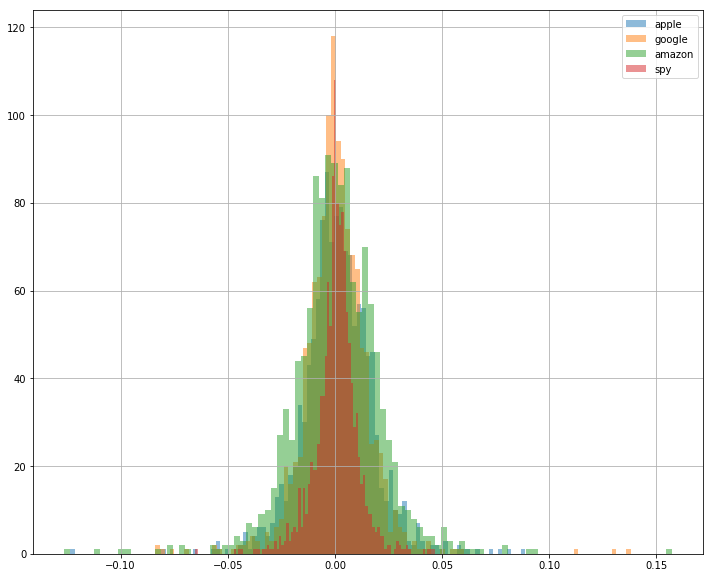

In [13]:
apple['returns'].hist(bins=100,label='apple',figsize=(12,10),alpha=0.5)
google['returns'].hist(bins=100,label='google',alpha=0.5)
amazon['returns'].hist(bins=100,label='amazon',alpha=0.5)
spy['returns'].hist(bins=100,label='spy',alpha=0.5)
plt.legend()
plt.savefig(plot_name('returns_all'))

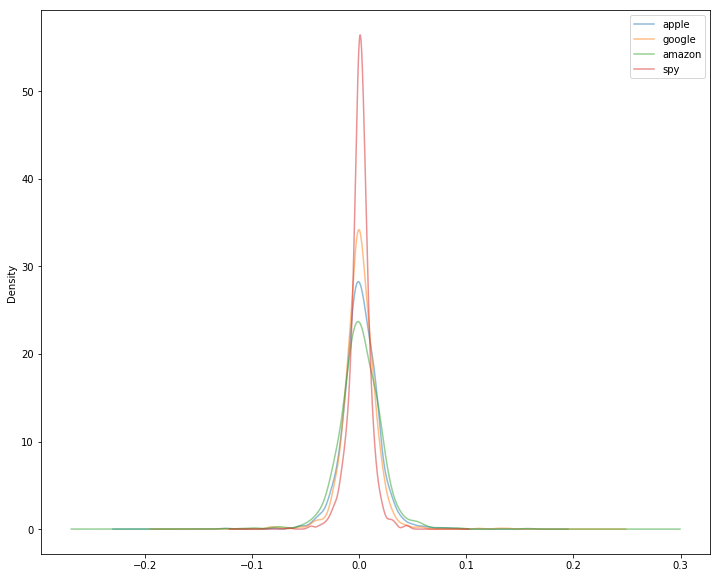

In [14]:
# KDE plot
apple['returns'].plot(kind='kde',label='apple',figsize=(12,10),alpha=0.5)
google['returns'].plot(kind='kde',label='google',alpha=0.5)
amazon['returns'].plot(kind='kde',label='amazon',alpha=0.5)
spy['returns'].plot(kind='kde',label='spy',alpha=0.5)
plt.legend()
plt.savefig(plot_name('returns_kde'))

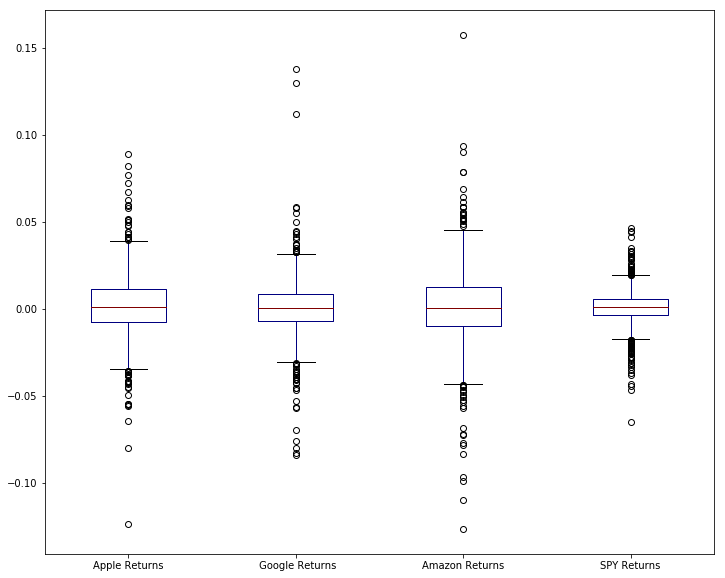

In [15]:
# Box plots to compare the results
box_df = pd.concat([apple['returns'],google['returns'],amazon['returns'], spy['returns']],axis=1)
box_df.columns = ['Apple Returns',' Google Returns','Amazon Returns', 'SPY Returns']
box_df.plot(kind='box',figsize=(12,10),colormap='jet')
plt.savefig(plot_name('returns_box'))

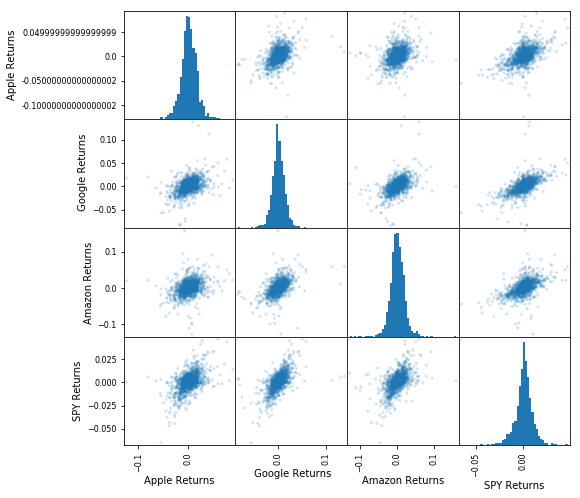

In [16]:
# Compare correlation of daily returns for the stocks
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});
plt.savefig(plot_name('returns_correlation'))

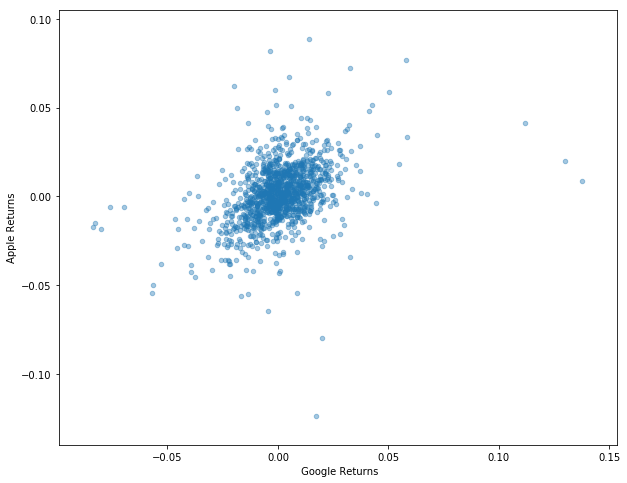

In [17]:
# plot the scatter plot if found any relationship
box_df.plot(kind='scatter',x=' Google Returns',y='Apple Returns',alpha=0.4,figsize=(10,8))
plt.savefig(plot_name('returns_scatter_apple_google'))

### Cummulative daily returns

In [18]:
# add the column
apple['Cumulative Return'] = (1 + apple['returns']).cumprod()
amazon['Cumulative Return'] = (1 + amazon['returns']).cumprod()
google['Cumulative Return'] = (1 + google['returns']).cumprod()
spy['Cumulative Return'] = (1 + spy['returns']).cumprod()

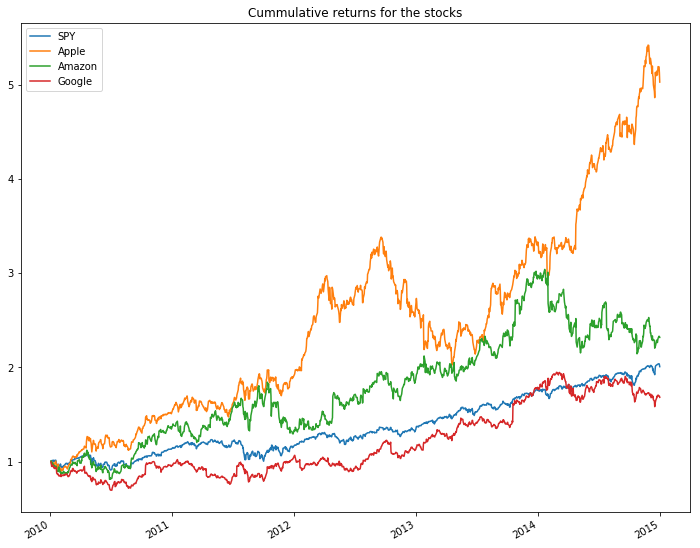

In [19]:
# plot the graphs
spy['Cumulative Return'].plot(label='SPY',figsize=(12,10),title=features.adj)
apple['Cumulative Return'].plot(label='Apple')
amazon['Cumulative Return'].plot(label='Amazon')
google['Cumulative Return'].plot(label='Google')
plt.title('Cummulative returns for the stocks')
plt.legend()
plt.savefig(plot_name('cummulative_returns_all'))